In [1]:
#Just the usual imports

import numpy as np
import pandas as pd
#import os 
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from mpl_toolkits import mplot3d
import math

directory = r'D:/Uni Potsdam/PhD/EDR3_500pc_sample/'
stars_confirmed = r'D:/Uni Potsdam/PhD/Observations/UVES_selection/'
v54 = r'D:/Uni Potsdam/PhD/papers/Scale_heights_Space_densities_WDs_sdOBs/'
BHBs = r'D:/Uni Potsdam/PhD/Catalogues/EDR3_catalogue/'
three_sig = r'D:/Uni Potsdam/PhD/EDR3_500pc_sample/'

data = pd.read_csv(directory+'329_stars_test.csv')
data_3sig = pd.read_csv(directory+'430_stars_3sig_ruwe6.csv')
data_raw = pd.read_csv(directory+'500pc_raw.csv')
data_277 = pd.read_csv(stars_confirmed+'500pc_sample_lb_277.csv')
data_1kpc = pd.read_csv(v54+'spec_confirmed_1kpc.csv')
data_2kpc = pd.read_csv(v54+'spec_confirmed_2kpc.csv')
data_BHBs = pd.read_csv(BHBs+'BHB_Rick_2kpc_clean.csv')

l,b,dist,source_id,ra,dec = data_277["l"],data_277["b"],1000/data_277["parallax_corr"],data_277["source_id"],data_277["ra"],data_277["dec"]


### Band boundaries (edit this!) 

In [2]:

#These are the inputs from the boandaries given in the paper. Maybe this should be different to make it easier...
ra_band_intervals = [120, 45, 30]
dec_bands = [[90, 60.4082], [60.4082, 31.4490], [31.4490, 0]]





# For the crazy loop later on. I change the input here. The output gives the longitude intervals for each latitude band (three bands here)

input_ra = []

for i in ra_band_intervals:
    interval_count = (360/i)   
    input_ra_1 = [0]
    j = i
    while j <= 360:
        input_ra_1.append(j)
        j=j+i
    input_ra.append(input_ra_1) 

input_ra
#interval
#Two separate loops needed? Make sure I do it in the correct order! (refer to diagram)  

[[0, 120, 240, 360],
 [0, 45, 90, 135, 180, 225, 270, 315, 360],
 [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]]

In [3]:
# A similar function as before. This simply finds the number of stars in each latitude band (once activated in the next cell)
def dec_bands_func(source_id, ra, dec, dist, dec_bands):
    
    star_id = []
    star_ra = []
    star_dec = []
    star_dist = []
    
    i=0
    while i < len(source_id):
        if dec[i] > dec_bands[1] and dec[i] < dec_bands[0]:
            star_id.append(source_id[i])
            star_ra.append(ra[i])
            star_dec.append(dec[i])
            star_dist.append(dist[i])
        
        i+=1
    
    return star_id, star_ra, star_dec, star_dist

In [4]:
star_id_all = []
star_ra_all = []
star_dec_all = []
star_dist_all = []

for i in range(len(dec_bands)):
    star_id, star_ra, star_dec, star_dist = dec_bands_func(source_id, ra, dec, dist, dec_bands[i])
    
    star_id_all.append(star_id)
    star_ra_all.append(star_ra)
    star_dec_all.append(star_dec)
    star_dist_all.append(star_dist)

star_ra_all # 2D array giving RA for each latitude band - starting with ~60 -90, then 31-60 etc. 

[[52.27389338535999,
  100.55812168483,
  118.60194538244,
  122.70633197211001,
  140.329555302738,
  145.97305632466998,
  154.50515380856,
  174.13952113325,
  192.70390035184,
  205.06136110435003,
  215.365229582,
  230.13094615573996,
  231.72076455257005,
  248.05990774840998,
  287.75788160567004,
  300.94299473214,
  310.19527645143995,
  324.57322329091],
 [11.889724710369999,
  16.20347824228,
  16.795871174240002,
  20.93842463804,
  29.58725405996,
  31.26531893073,
  50.41551134524,
  67.80107,
  99.96724169865999,
  103.35122843191,
  107.532293377698,
  142.695471699956,
  143.44942904908999,
  144.58480032898,
  158.8186231748,
  159.90315063392998,
  188.96312809231003,
  188.96312809230702,
  192.51828969093998,
  200.89656571887002,
  212.13412819967,
  228.909513066512,
  235.16267940211003,
  240.07585251189,
  241.392232861657,
  242.838871413097,
  245.16133939804,
  246.81879260202004,
  257.55505045532004,
  258.07821653441005,
  259.32829516728,
  266.6330770

In [5]:
# Now I create this crazy loop to then find the number of stars in each area cell i.e. just a longitude/RA selection using the 'star_ra_all' array created previously 
# This somehow works. See the output 'segment_all_ra'


segment_all_ra = []
#segment_all_dec = []
#segment_all_dist = []
#segment_all_id = []

for i in range(len(star_ra_all)):
    band_ra = []
    band_dec = []
    for j in input_ra[i]:
        if j < 360:
            segment_ra = []
            segment_dec = []
            for k in star_ra_all[i]:
                if k > j and k < j+(360/(len(input_ra[i])-1)):
                    segment_ra.append(k)
#                    segment_dec.append(star_dec_all[i][k])
#                    for l in star_dec_all[i]: 
#                        segment_dec.append(l)
                    
            band_ra.append(segment_ra)
#            band_dec.append(segment_dec)
    segment_all_ra.append(band_ra) 
#    segment_all_dec.append(band_dec)
segment_all_ra   
#segment_all_dec


[[[52.27389338535999, 100.55812168483, 118.60194538244],
  [122.70633197211001,
   140.329555302738,
   145.97305632466998,
   154.50515380856,
   174.13952113325,
   192.70390035184,
   205.06136110435003,
   215.365229582,
   230.13094615573996,
   231.72076455257005],
  [248.05990774840998,
   287.75788160567004,
   300.94299473214,
   310.19527645143995,
   324.57322329091]],
 [[11.889724710369999,
   16.20347824228,
   16.795871174240002,
   20.93842463804,
   29.58725405996,
   31.26531893073],
  [50.41551134524, 67.80107],
  [99.96724169865999, 103.35122843191, 107.532293377698],
  [142.695471699956,
   143.44942904908999,
   144.58480032898,
   158.8186231748,
   159.90315063392998],
  [188.96312809231003,
   188.96312809230702,
   192.51828969093998,
   200.89656571887002,
   212.13412819967],
  [228.909513066512,
   235.16267940211003,
   240.07585251189,
   241.392232861657,
   242.838871413097,
   245.16133939804,
   246.81879260202004,
   257.55505045532004,
   258.0782165

### This next part I'm stuck on. Need to get the parallax and dec for each star not just the RA...


In [6]:
#Test if all stars are accounted for (northern hemisphere)
star_list = []  
for i in segment_all: 
    for j in i: 
        for k in j: 
            star_list.append(k)
len(star_list)

NameError: name 'segment_all' is not defined

In [7]:
dec_list = []
i = 0
while i < len(ra) - 1:
    for j in segment_all_ra: 
        for k in j: 
            for l in k: 
#                print(l)
                if l in ra: 
                    dec_list.append(l)
#            print(k)
#            if ra[i] in k: 
 #               dec_list.append(dec[i])
    i = i+1
len(dec_list)


27600

In [8]:
dec_list

[52.27389338535999,
 100.55812168483,
 118.60194538244,
 122.70633197211001,
 140.329555302738,
 145.97305632466998,
 154.50515380856,
 174.13952113325,
 192.70390035184,
 205.06136110435003,
 215.365229582,
 230.13094615573996,
 231.72076455257005,
 248.05990774840998,
 11.889724710369999,
 16.20347824228,
 16.795871174240002,
 20.93842463804,
 29.58725405996,
 31.26531893073,
 50.41551134524,
 67.80107,
 99.96724169865999,
 103.35122843191,
 107.532293377698,
 142.695471699956,
 143.44942904908999,
 144.58480032898,
 158.8186231748,
 159.90315063392998,
 188.96312809231003,
 188.96312809230702,
 192.51828969093998,
 200.89656571887002,
 212.13412819967,
 228.909513066512,
 235.16267940211003,
 240.07585251189,
 241.392232861657,
 242.838871413097,
 245.16133939804,
 246.81879260202004,
 257.55505045532004,
 258.07821653441005,
 259.32829516728,
 266.63307706727994,
 270.07843502252996,
 1.89071,
 3.59271102016,
 11.87176841852,
 14.98627744421,
 16.09035957658,
 24.10923730788,
 31.7

### Now to extract all other parameters using segment_all_ra

In [9]:
segment_all_dec = []
segment_all_dist = []
segment_all_id = []

#i = 0
#while i < len(segment_all_ra) - 1:
#    for 


for i in range(len(ra)):
    band_dec = []
#    print(dec[i])
    for j in segment_all_ra:
        segment_dec = []
        for k in j:           
            if ra[i] in k:
                segment_dec.append(dec[i])                
#                print('yes!')
        band_dec.append(segment_dec)    
    segment_all_dec.append(band_dec)            
#    if ra[i] == 

segment_all_dec




[[[], [], []],
 [[], [], [13.59924]],
 [[], [], []],
 [[], [], [28.615403101590005]],
 [[], [], []],
 [[], [], []],
 [[], [], [9.98224423744]],
 [[], [53.07913611926], []],
 [[], [], []],
 [[], [], [15.7371745181]],
 [[], [], []],
 [[], [], [4.226828234030001]],
 [[], [36.461845729029996], []],
 [[], [51.172744852940006], []],
 [[], [], []],
 [[], [], []],
 [[], [36.96310439831], []],
 [[], [], [11.65880774656]],
 [[], [], []],
 [[], [], []],
 [[], [], []],
 [[], [], []],
 [[], [], []],
 [[], [47.061834455749995], []],
 [[], [], []],
 [[], [46.26428634498], []],
 [[], [], [14.64949286811]],
 [[], [], []],
 [[], [], [28.05815658711]],
 [[], [], [18.527220463520003]],
 [[], [], []],
 [[], [], [23.7030251332381]],
 [[], [], []],
 [[], [], []],
 [[], [], []],
 [[], [], []],
 [[], [], []],
 [[], [], [14.773216025450001]],
 [[], [47.455185064700004], []],
 [[64.07828351934], [], []],
 [[], [], []],
 [[], [], [2.79776795997]],
 [[], [], [25.7559731326112]],
 [[], [], [10.75112627082]],
 [[], 

In [10]:
segment_all_dist

[]

### Now we want to plot projected count over distance

IndexError: list index out of range

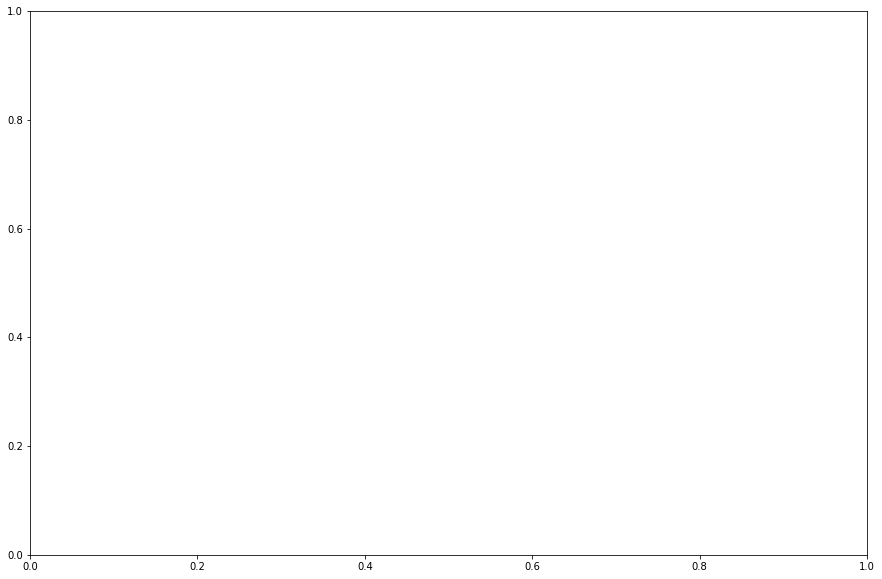

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(segment_all_dist[0][1])#, bins = 10)
plt.show()

In [12]:
#for i in range(len(input_ra)):
#    bla = []
#    bla2 = []
#    for j in range(len(input_ra):

segment_all = []

for i in range(len(star_ra_all)):    
    for j in input_ra[i]: 
        print(j)
        segment = []
        for k in star_ra_all[i]:            
#            print(k)
            if k > input_ra[i][j] and k < input_ra[i][j+1]:
#                print(k)
                segment.append(k)
    segment_all.append(segment)
#segment_all            
#        print(j)

#        if k in star_ra_all[i] > j and k in star_ra_all[i] < j+1:
#            print('yes')
                
#    segment = []
#    segment.append()
#    for j in i: 
#        if j < and j> :

0
120


IndexError: list index out of range